# **Decision Tree**

**Objective:**

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

**Tasks:**

Task 1: Data Preparation

1) Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

Task 2: Exploratory Data Analysis (EDA)

1) Perform exploratory data analysis to understand the structure of the dataset.

2) Check for missing values, outliers, and inconsistencies in the data.

3) Visualize the distribution of features, including histograms, box plots, and correlation matrices.

Task 3: Feature Engineering

4) If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

Task 4: Decision Tree Classification

1) Split the dataset into training and testing sets (e.g., using an 80-20 split).

2) Implement a Decision Tree Classification model using a library like scikit-learn.

3) Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

Task 5: Hyperparameter Tuning

1) Perform hyperparameter tuning to optimize the Decision Tree model.

2) Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

Task 6: Model Evaluation and Analysis

1) Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

2) Visualize the decision tree structure to understand the rules learned by the model and identify important features

**Task 1: Data Preparation**

1) Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_disease.csv')

In [ ]:
print(data.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0  


In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [ ]:
print(data.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


**Task 2: Exploratory Data Analysis (EDA)**

1) Perform exploratory data analysis to understand the structure of the dataset.

2) Check for missing values, outliers, and inconsistencies in the data.

3) Visualize the distribution of features, including histograms, box plots, and correlation matrices.

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


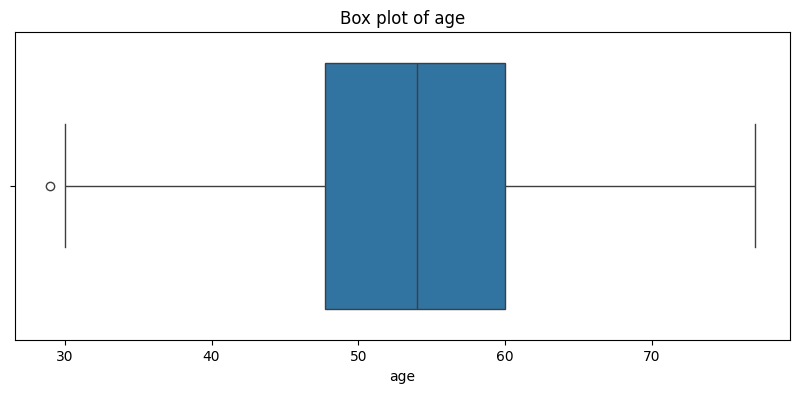

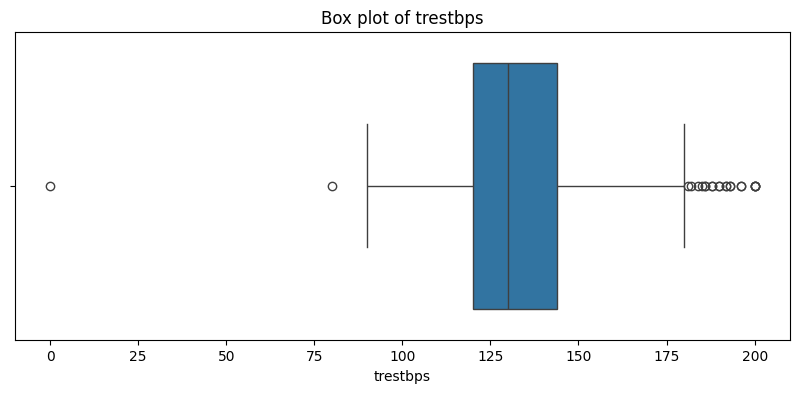

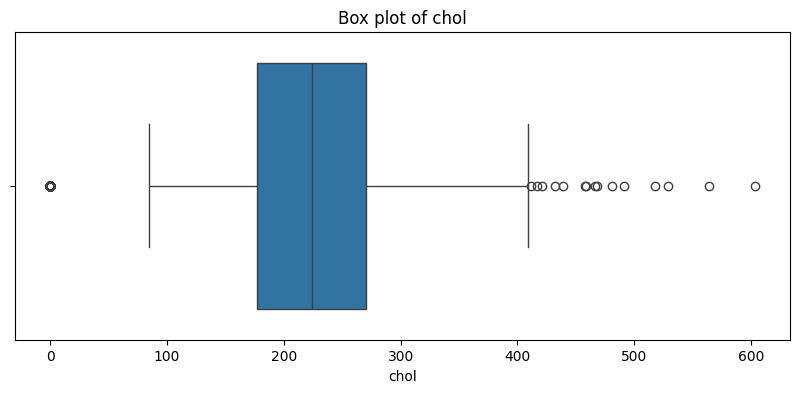

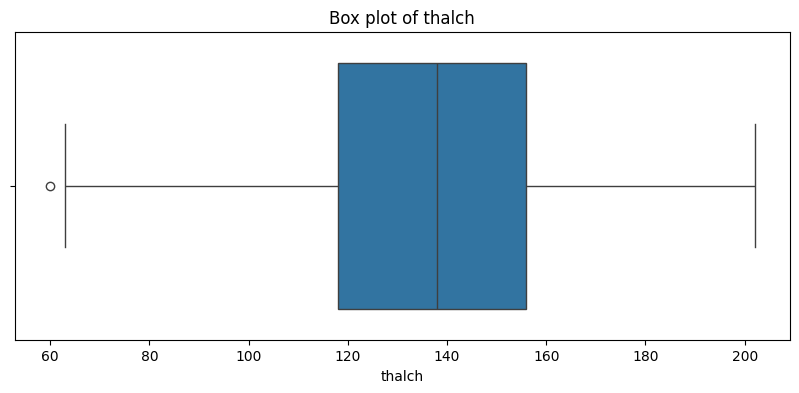

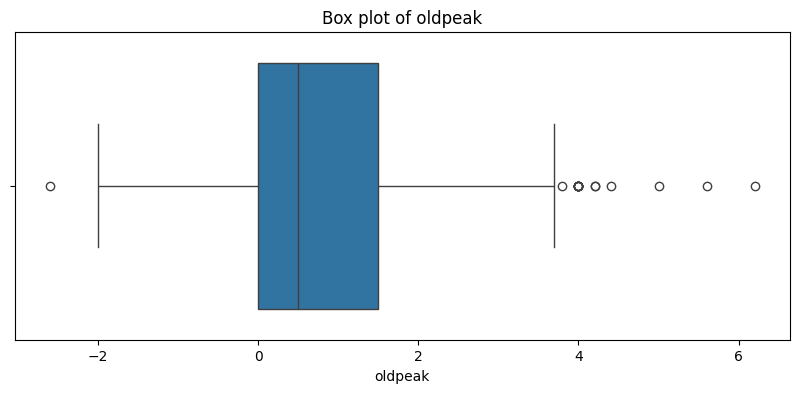

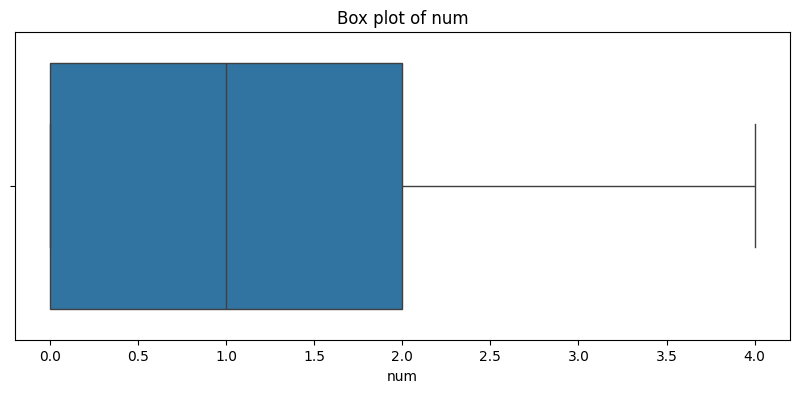

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Check for outliers using box plots
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()


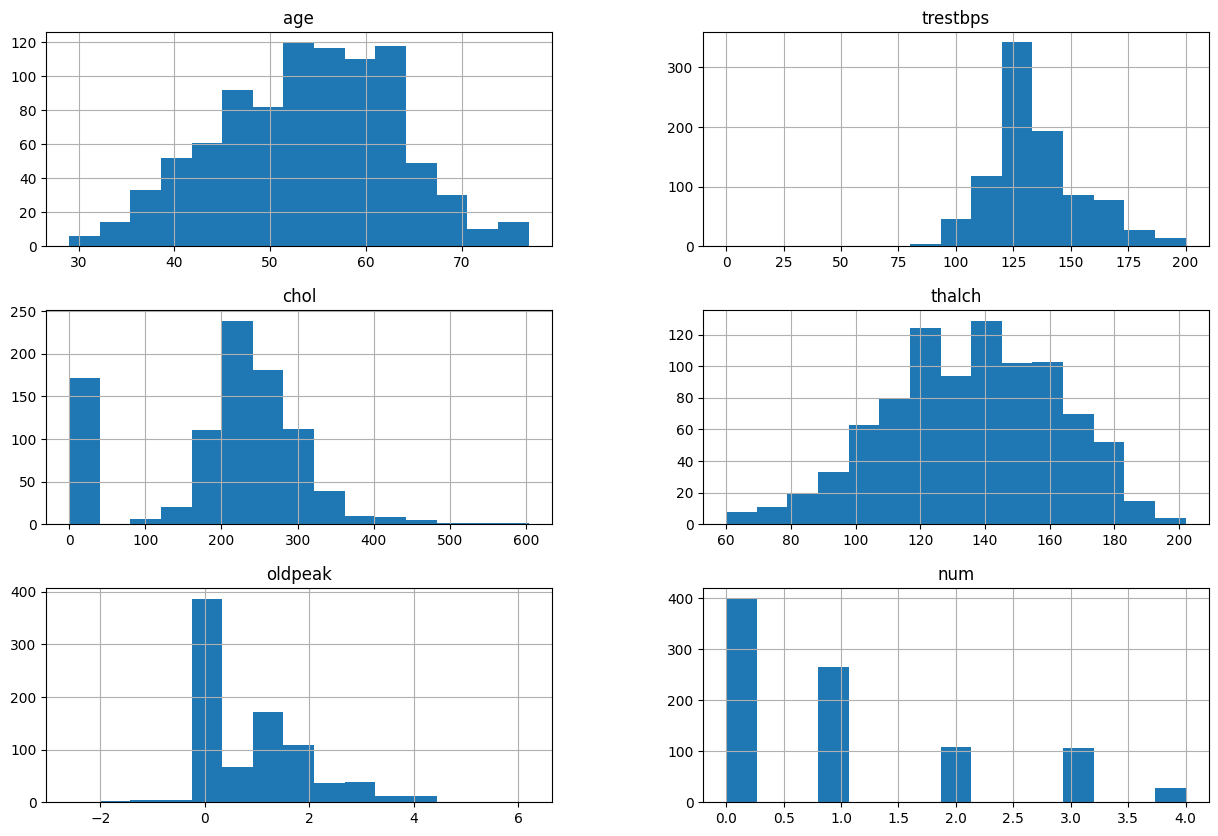

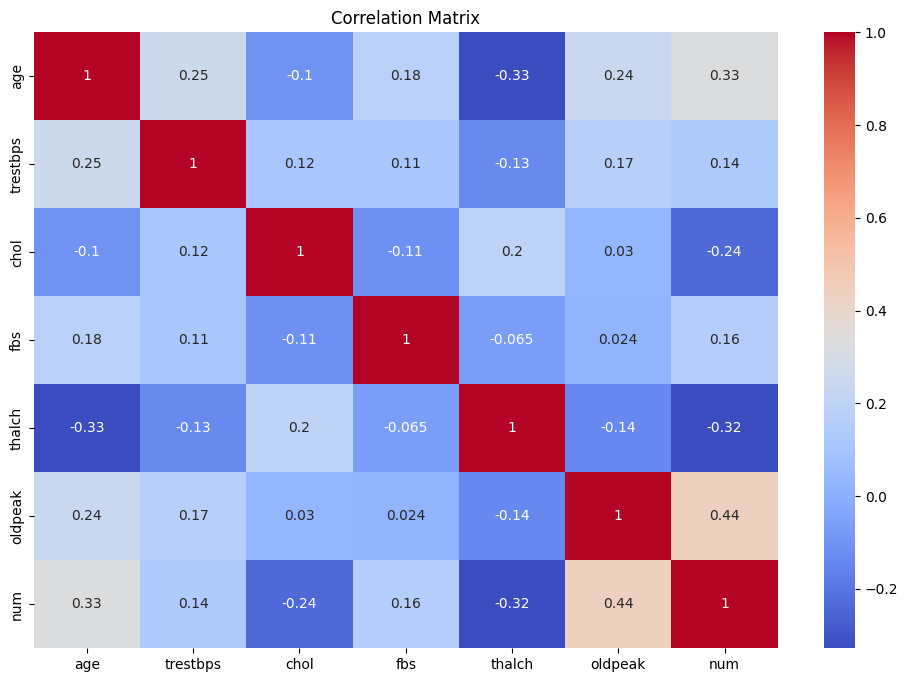

In [ ]:
# Histograms for numerical features
data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
data = data.dropna()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,reversable defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,TRUE,3.0,flat,fixed defect,4
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4


**Task 3: Feature Engineering**

1) If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    data[feature] = LabelEncoder().fit_transform(data[feature])

# Scale numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Check the data after encoding and scaling
print(data.head())


        age  sex  cp  trestbps      chol    fbs  restecg    thalch  exang  \
0  1.052849    1   3  0.652591  0.271960   True        0  0.501387      0   
1 -1.366364    1   1  0.132633  0.003114  False        1 -0.201922      0   
2  0.393064    1   0  0.392612 -0.095463  False        1  0.423242      0   
3 -0.156758    1   3 -0.751298 -0.149232  False        0  2.064297      0   
4  0.393064    1   0 -1.167265 -0.014809  False        1 -0.436358      1   

    oldpeak  slope  thal       num  
0  1.288612      0     0 -0.868621  
1 -0.815249      1     0 -0.868621  
2 -0.449360      1     0 -0.868621  
3 -0.815249      1     0 -0.868621  
4  0.556834      1     0 -0.868621  


**Task 4: Decision Tree Classification**

1) Split the dataset into training and testing sets (e.g., using an 80-20 split).

2) Implement a Decision Tree Classification model using a library like scikit-learn.

3) Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

# Define features (X) and target (y)
X = data.drop('num', axis=1)
y = data['num']

lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.5765
Precision: 0.5765
Recall: 0.5765
F1 Score: 0.5765
ROC-AUC: 0.6486

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76        80
           1       0.42      0.59      0.49        41
           2       0.33      0.36      0.34        14
           3       0.50      0.26      0.34        27
           4       0.33      0.12      0.18         8

    accuracy                           0.58       170
   macro avg       0.47      0.42      0.42       170
weighted avg       0.58      0.58      0.57       170



**Task 5: Hyperparameter Tuning**

1) Perform hyperparameter tuning to optimize the Decision Tree model.

2) Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.4f}')


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 30}
Best Cross-Validation Score: 0.5341


**Task 6: Model Evaluation and Analysis**

1) Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

2) Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [ ]:
# Initialize and train the optimized Decision Tree model
optimized_model = DecisionTreeClassifier(**best_params, random_state=42)
optimized_model.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = optimized_model.predict(X_test)

# Evaluate the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='micro')
recall_optimized = recall_score(y_test, y_pred_optimized, average='micro')
f1_optimized = f1_score(y_test, y_pred_optimized, average='micro')

# Predict probabilities
y_pred_optimized_prob = model.predict_proba(X_test)

roc_auc_optimized = roc_auc_score(y_test, y_pred_optimized_prob, multi_class='ovr')

print(f'Optimized Accuracy: {accuracy_optimized:.4f}')
print(f'Optimized Precision: {precision_optimized:.4f}')
print(f'Optimized Recall: {recall_optimized:.4f}')
print(f'Optimized F1 Score: {f1_optimized:.4f}')
print(f'Optimized ROC-AUC: {roc_auc_optimized:.4f}')
print('\nOptimized Classification Report:\n', classification_report(y_test, y_pred_optimized))


Optimized Accuracy: 0.5059
Optimized Precision: 0.5059
Optimized Recall: 0.5059
Optimized F1 Score: 0.5059
Optimized ROC-AUC: 0.6486

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        80
           1       0.31      0.56      0.40        41
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         8

    accuracy                           0.51       170
   macro avg       0.23      0.27      0.24       170
weighted avg       0.46      0.51      0.47       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Interview Questions:**

1. **What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

Ans: Decision Tree models have several hyperparameters that you can tune to optimize their performance. Here are some of the common hyperparameters and how they affect the model:

Common Hyperparameters and Their Effects

1) max_depth:
The maximum depth of the tree. Controls how deep the tree can grow.

Effect: Limiting the depth can prevent overfitting. A shallow tree (small max_depth) might underfit, while a deep tree (large max_depth) might overfit.

2) min_samples_split:
The minimum number of samples required to split an internal node.

Effect: Higher values prevent the model from learning overly specific patterns, thereby reducing overfitting. Lower values can lead to a more complex tree.

3) min_samples_leaf: The minimum number of samples required to be at a leaf node.

Effect: Ensures that leaf nodes have a minimum number of samples, which can help in smoothing the model and reducing overfitting.

4) max_features: The number of features to consider when looking for the best split.

Effect: Reducing the number of features can decrease the variance of the model but might increase bias. It's useful in reducing overfitting.

5) criterion: The function to measure the quality of a split. Options include "gini" for Gini impurity and "entropy" for information gain.

Effect: Different criteria can lead to different tree structures. Gini impurity is faster to compute, while entropy might provide better splits but is computationally more expensive.

6) splitter: The strategy used to split at each node. Options include "best" to choose the best split and "random" to choose the best random split.

Effect: The "random" splitter can help in reducing variance by creating multiple trees with different splits when used in ensemble methods.

7) max_leaf_nodes: The maximum number of leaf nodes in the tree.

Effect: Limiting the number of leaf nodes can help in simplifying the model and reducing overfitting.

8) min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

Effect: Helps in stopping the growth of the tree earlier ifsplits do not improve the model significantly, thus reducing overfitting.


2. **What is the difference between the Label encoding and One-hot encoding?**

Ans: Label Encoding and One-Hot Encoding are two common techniques used to convert categorical variables into numerical formats that machine learning algorithms can process. Here's a detailed comparison of the two:

**Label Encoding**

Description:

Label Encoding assigns each unique category in a categorical feature an integer value. For example, if you have a feature "Color" with categories "Red," "Green," and "Blue," Label Encoding might assign "Red" = 0, "Green" = 1, and "Blue" = 2.

encoder = LabelEncoder()

data['Color_encoded'] = encoder.fit_transform(data['Color'])

Pros:

Simplicity: Easy to implement and does not add additional columns to the dataset.

Memory Efficient: Only one column is created, which is efficient in terms of memory and computation.

Cons:

Ordinality Assumption: Implicitly assumes an ordinal relationship between the categories (e.g., 0 < 1 < 2), which may not be true for non-ordinal data.

Bias in Models: Algorithms that interpret the encoded values as having a numerical relationship (e.g., linear models, distance-based algorithms) might be biased by the encoding.

Suitable for:

Ordinal categorical variables where there is a natural order (e.g., "low," "medium," "high").

**One-Hot Encoding**

Description:

One-Hot Encoding creates a new binary column for each unique category in the categorical feature. Each row will have a 1 in the column corresponding to its category and 0 in all other columns.

encoder = OneHotEncoder(sparse=False)

encoded_features = encoder.fit_transform(data[['Color']])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.
get_feature_names_out(['Color']))

data = pd.concat([data, encoded_df], axis=1)

data.drop('Color', axis=1, inplace=True)


Pros:

No Ordinality Assumption: Does not assume any ordinal relationship between the categories.

Compatibility: Works well with algorithms that do not assume a numerical relationship between categories (e.g., tree-based methods, neural networks).

Cons:

Increased Dimensionality: Adds a new column for each unique category, which can lead to a significant increase in the number of features, especially with high-cardinality categorical features.

Memory and Computation: Can be less memory efficient and computationally more intensive due to the increased number of columns.

Suitable for:

Nominal categorical variables where there is no natural order (e.g., "Color" categories like "Red," "Green," "Blue").

Situations where the increase in dimensionality can be managed.